# <p style="color:green">Lead Score Case Study</p>

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## <p style="color:red">1. Data Reading and Understanding</p>

In [2]:
# Read Dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of Dataset
df.shape

(9240, 37)

In [4]:
# Check Statistical Summary Of Numerical Filed
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Store Lead Number
Lead_Number = df['Lead Number']

In [6]:
df.rename(columns={'What is your current occupation':'Current Occupation', 
                  'Total Time Spent on Website' : 'Time Spent', 
                  'How did you hear about X Education':'Hear From', 
                  'I agree to pay the amount through cheque':'Pay Through Cheque', 
                  'What matters most to you in choosing a course':'Purpose', 
                  'Update me on Supply Chain Content':'Supply Chain Content', 
                  'Receive More Updates About Our Courses':'More Update', 
                  'A free copy of Mastering The Interview':'Mastering Interview', 
                  'Last Notable Activity':'Last Activity'}, inplace=True)

## <p style="color:red">2. Data Cleaning</p>

### `Handle Missing Value`

In [7]:
# Check Null Values
pd.Series(df.isna().sum() * 100 / len(df))[ df.isna().sum() * 100 / len(df)  > 0 ]

Lead Source                     0.389610
TotalVisits                     1.482684
Page Views Per Visit            1.482684
Last Activity                   1.114719
Country                        26.634199
Specialization                 15.562771
Hear From                      23.885281
Current Occupation             29.112554
Purpose                        29.318182
Tags                           36.287879
Lead Quality                   51.590909
Lead Profile                   29.318182
City                           15.367965
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

#### Drop columns which have more than 40% missing data.

In [8]:
# Drop Columns
df.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
         'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

#### `Country`

In [9]:
# Check Value Counts
df.Country.value_counts(normalize=True).head() * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
Name: Country, dtype: float64

- Here, Country's Data are skewed. We Drop this Column.

In [10]:
# Drop Country Column
df.drop('Country', axis=1, inplace=True)

#### `City`

In [11]:
# Check Value Counts
df.City.value_counts(normalize=True) * 100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

- In this column 15% data are null and 'Select' is also consider as null value. So, more than 40% data are null and we drop this column.

In [12]:
# Drop City Column
df.drop('City', axis=1, inplace=True)

#### `Lead Profile`

In [13]:
# Check Value Counts
df['Lead Profile'].value_counts(normalize=True) * 100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

- In this column 29% data are null and 'Select' is also consider as null value. So, more than 60% data are null and we drop this column.

In [14]:
# Drop Lead Profile Column
df.drop('Lead Profile', axis=1, inplace=True)

#### `Lead Source`

In [15]:
# Check Value Counts
df['Lead Source'].value_counts(normalize=True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
blog                  0.010865
youtubechannel        0.010865
NC_EDM                0.010865
testone               0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

In [16]:
# Fill Null Values with 'Google'
df['Lead Source'] = df['Lead Source'].fillna('Google')

- Here Data are divided into so many small chunks. We can combine them for better understanding.

In [17]:
def func(x):
    if x in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search']:
        return x
    else:
        return 'Other'

In [18]:
# Combine Data
df['Lead Source'] = df['Lead Source'].apply(func=func)

In [19]:
# Check Value Counts
df['Lead Source'].value_counts(normalize=True) * 100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Other              9.567100
Name: Lead Source, dtype: float64

#### `Purpose`

In [20]:
# Check Value Counts
df['Purpose'].value_counts(normalize=True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: Purpose, dtype: float64

- Here, Purpose's Data are skewed. We Drop this Column.

In [21]:
# Drop Column
df.drop('Purpose', axis=1, inplace=True)

#### `Current Occupation`

In [22]:
# Check Value Counts
df['Current Occupation'].value_counts(normalize=True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: Current Occupation, dtype: float64

In [23]:
# Fill Null Value With Mode
df['Current Occupation'] = df['Current Occupation'].fillna(df['Current Occupation'].mode()[0])

- Here Data are divided into so many small chunks. We can combine them for better understanding.

In [24]:
def func(x):
    if x in ['Unemployed', 'Working Professional']:
        return x
    else:
        return 'Other'

In [25]:
# Combine Data
df['Current Occupation'] = df['Current Occupation'].apply(func=func)

In [26]:
# Check Value Counts
df['Current Occupation'].value_counts(normalize=True) * 100

Unemployed              89.718615
Working Professional     7.640693
Other                    2.640693
Name: Current Occupation, dtype: float64

#### `Tags`

In [27]:
df['Tags'].value_counts(normalize=True) * 100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [28]:
# Fill Null Value With Mode
df['Tags'] = df['Tags'].fillna(df['Tags'].mode()[0])

- Here Data are divided into so many small chunks. We can combine them for better understanding.

In [29]:
def func(x):
    if x in ['Will revert after reading the email', 
             'Ringing']:
        return x
    else:
        return 'Other'

In [30]:
# Combine Data
df['Tags'] = df['Tags'].apply(func=func)

In [31]:
# Check Value Counts
df['Tags'].value_counts(normalize=True) * 100

Will revert after reading the email    58.712121
Other                                  28.268398
Ringing                                13.019481
Name: Tags, dtype: float64

#### `Total Visits and Page Views Per Visit`

In [32]:
# Statistical Summary
df[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


- Fill Null values with Median.

In [33]:
# Fill Null Values
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

#### `Specialization`

In [34]:
# Check Value Counts
df['Specialization'].value_counts(normalize=True) * 100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Media and Advertising                 2.601897
Travel and Tourism                    2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [35]:
# Replace Select With NaN
df['Specialization'] = df['Specialization'].replace('Select', np.NaN)

In [36]:
# Check Null Values
df['Specialization'].isnull().sum() / len(df) * 100

36.58008658008658

In [37]:
# Drop Column
df.drop('Specialization', axis=1, inplace=True)

#### `Hear From`

In [38]:
# Check Value Counts
df['Hear From'].value_counts(normalize=True) * 100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: Hear From, dtype: float64

- In this column 23% data are null and 71% Value 'Select' is also consider as null value. So, more than 85% data are null and we drop this column.

In [39]:
# Drop Column
df.drop('Hear From', axis=1, inplace=True)

#### `Last Activity`

In [40]:
# Create New Column
df['Last Activity 0'] = df['Last Activity'].iloc[:,0]

In [41]:
# Create New Column
df['Last Activity 1'] = df['Last Activity'].iloc[:,1]

In [42]:
# Drop Column
df.drop('Last Activity', axis=1, inplace=True)

In [43]:
df['Last Activity 0'].value_counts(normalize=True) * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity 0, dtype: float64

In [44]:
df['Last Activity 1'].value_counts(normalize=True) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
View in browser link Clicked     0.010823
Approached upfront               0.010823
Email Received                   0.010823
Form Submitted on Website        0.010823
Resubscribed to emails           0.010823
Name: Last Activity 1, dtype: float64

- Here Data are divided into so many small chunks. We can combine them for better understanding.

In [45]:
def func(x):
    if x in ['SMS Sent', 'Email Opened']:
        return x
    else:
        return 'Other'

In [46]:
# Combine Data and Fill Null Values With Other
df['Last Activity 0'] = df['Last Activity 0'].apply(func=func)
df['Last Activity 1'] = df['Last Activity 1'].apply(func=func)

In [47]:
# Check Value Counts
df['Last Activity 0'].value_counts(normalize=True) * 100

Email Opened    37.196970
Other           33.095238
SMS Sent        29.707792
Name: Last Activity 0, dtype: float64

In [48]:
# Check Value Counts
df['Last Activity 1'].value_counts(normalize=True) * 100

Other           45.898268
Email Opened    30.595238
SMS Sent        23.506494
Name: Last Activity 1, dtype: float64

In [49]:
# Check Null Values
pd.Series(df.isna().sum() * 100 / len(df))[ df.isna().sum() * 100 / len(df)  > 0 ]

Series([], dtype: float64)

### `Remove Unwanted Column and Analyze Column`

#### `Lead Origin`

In [50]:
# Check Value Counts
df['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

- Here Data are divided into so many small chunks. We can combine them for better understanding.

In [51]:
def func(x):
    if x in ['Landing Page Submission', 'API']:
        return x
    else:
        return 'Other'

In [52]:
# Combine Data
df['Lead Origin'] = df['Lead Origin'].apply(func=func)

In [53]:
# Check Value Counts
df['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Other                       8.376623
Name: Lead Origin, dtype: float64

#### `Do Not Email`

In [54]:
# Check Value Counts
df['Do Not Email'].value_counts(normalize=True) * 100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

#### `Do Not Call`

In [55]:
# Check Value Counts
df['Do Not Call'].value_counts(normalize=True) * 100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

- Here, Do Not Call's Data are skewed. We Drop this Column.

In [56]:
# Drop Column
df.drop(['Do Not Call'], axis=1, inplace=True)

#### `Skewed Columns`

In [57]:
df['Search'].value_counts(normalize=True) * 100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [58]:
df['Magazine'].value_counts(normalize=True) * 100

No    100.0
Name: Magazine, dtype: float64

In [59]:
df['Newspaper Article'].value_counts(normalize=True) * 100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [60]:
df['Newspaper'].value_counts(normalize=True) * 100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [61]:
df['Digital Advertisement'].value_counts(normalize=True) * 100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [62]:
df['X Education Forums'].value_counts(normalize=True) * 100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [63]:
df['Supply Chain Content'].value_counts(normalize=True) * 100

No    100.0
Name: Supply Chain Content, dtype: float64

In [64]:
df['More Update'].value_counts(normalize=True) * 100

No    100.0
Name: More Update, dtype: float64

In [65]:
df['Get updates on DM Content'].value_counts(normalize=True) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [66]:
df['Through Recommendations'].value_counts(normalize=True) * 100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

- Here, Data are skewed. We Drop these Columns.

In [67]:
# Drop Columns
df.drop(['X Education Forums', 'Digital Advertisement',
         'Newspaper', 'Newspaper Article', 'Search', 'Magazine',
         'Supply Chain Content', 'Through Recommendations',
         'More Update', 'Get updates on DM Content'], axis=1, inplace=True)

#### `Unwanted Columns`

In [68]:
# Drop Columns
df.drop(['Prospect ID', 'Lead Number', 'Pay Through Cheque', 'Mastering Interview'], axis=1, inplace=True)

In [69]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time Spent,Page Views Per Visit,Current Occupation,Tags,Last Activity 0,Last Activity 1
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Other,Other,Other
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Ringing,Email Opened,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Other,Will revert after reading the email,Email Opened,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Ringing,Other,Other
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Will revert after reading the email,Other,Other


## <p style="color:red">3. Exploratory Data Analysis</p>

In [70]:
column_name = list(df.columns)

In [71]:
# Change D-Type
df[column_name[:4]] = df[column_name[:4]].astype('category')
df[column_name[-4:]] = df[column_name[-4:]].astype('category')

### `Univariate Analysis`

In [72]:
numerical_col = list(df.dtypes[df.dtypes != 'category'].index)
numerical_col

['TotalVisits', 'Time Spent', 'Page Views Per Visit']

In [73]:
categorical_col = list(df.dtypes[df.dtypes == 'category'].index)
categorical_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Current Occupation',
 'Tags',
 'Last Activity 0',
 'Last Activity 1']

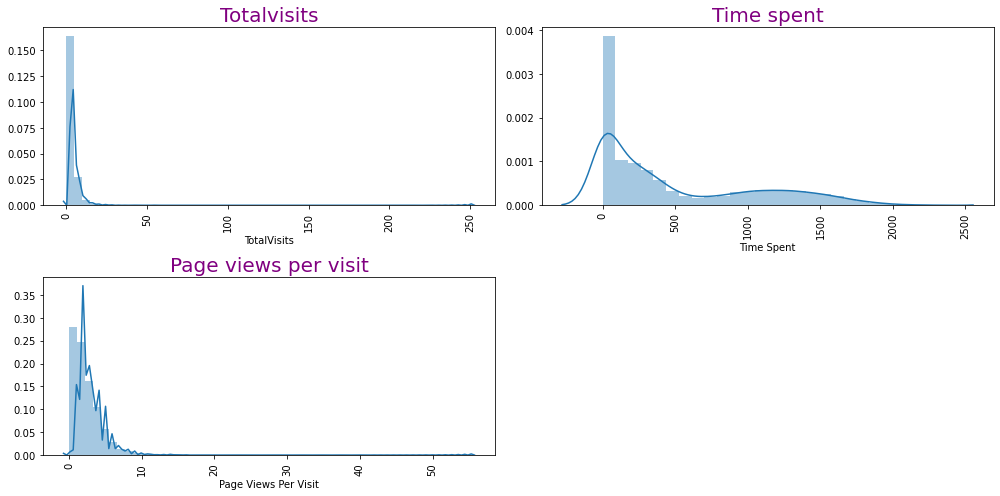

In [74]:
# Distribution plot
plt.figure(figsize=[14,7])
j=1

for i in numerical_col:
    plt.subplot(2,2,j)
    sns.distplot(df[i])
    plt.title(i.capitalize(), fontdict={'color':'purple', 'size':20})
    plt.xticks(rotation=90)
    j = j + 1

plt.tight_layout()
plt.show()

- Most part of graphs are normally distributed.

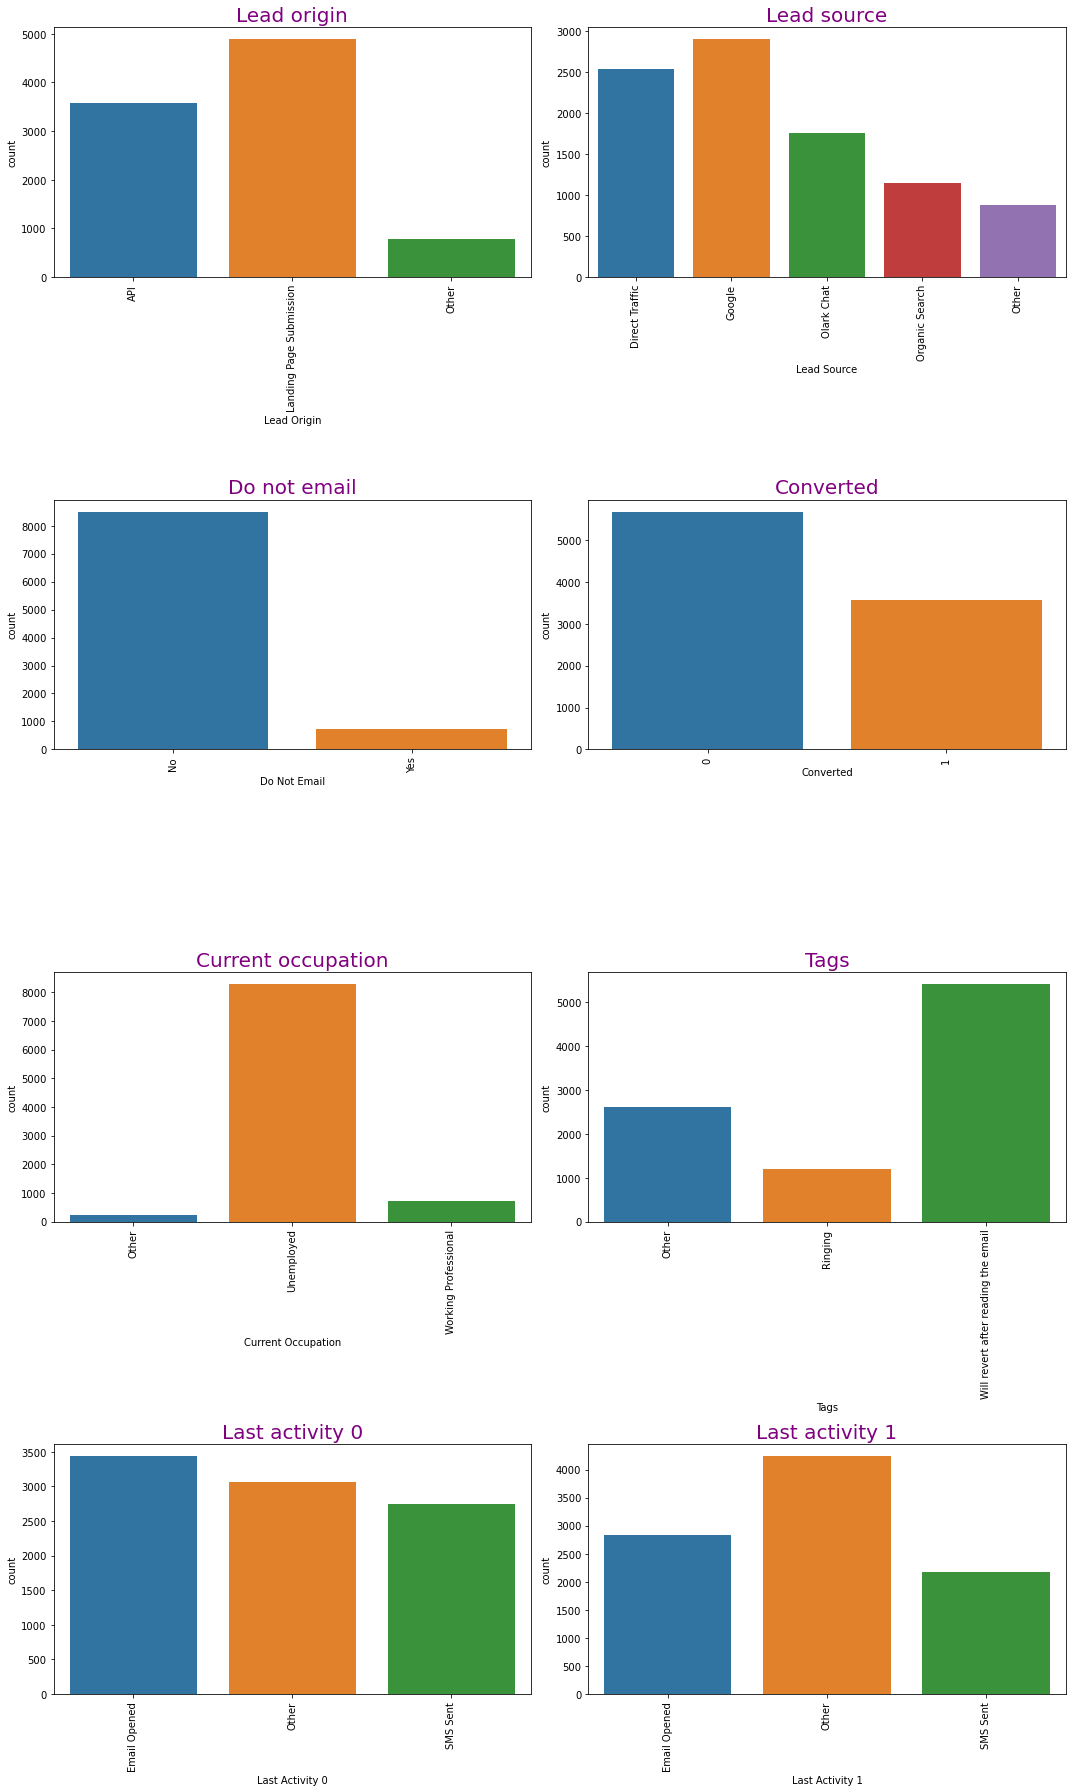

In [75]:
# Count plot
plt.figure(figsize=[15,25])
j=1

for i in categorical_col:
    plt.subplot(4,2,j)
    sns.countplot(df[i])
    plt.title(i.capitalize(), fontdict={'color':'purple', 'size':20})
    plt.xticks(rotation=90)
    j = j + 1

plt.tight_layout()
plt.show()

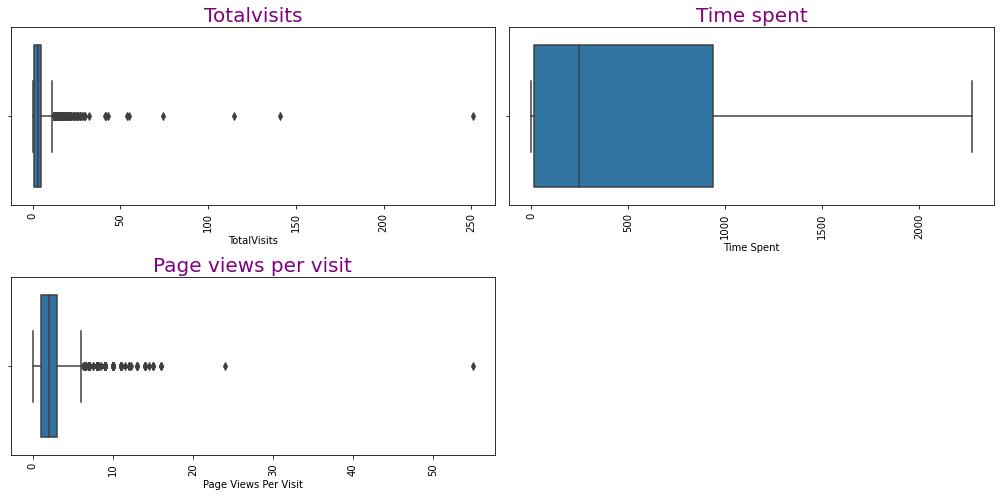

In [76]:
# Box plot
plt.figure(figsize=[14,7])
j=1

for i in numerical_col:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(i.capitalize(), fontdict={'color':'purple', 'size':20})
    plt.xticks(rotation=90)
    j = j + 1

plt.tight_layout()
plt.show()

- There are outliers in most of columns.

In [77]:
df[df['TotalVisits'] > 30]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time Spent,Page Views Per Visit,Current Occupation,Tags,Last Activity 0,Last Activity 1
1160,Landing Page Submission,Direct Traffic,No,0,43.0,57,3.91,Unemployed,Other,Email Opened,Email Opened
2190,Landing Page Submission,Direct Traffic,Yes,0,55.0,297,55.00,Unemployed,Will revert after reading the email,Other,Other
2322,Landing Page Submission,Direct Traffic,Yes,0,141.0,755,6.71,Unemployed,Will revert after reading the email,Other,Other
5283,Landing Page Submission,Direct Traffic,Yes,0,74.0,1209,12.33,Unemployed,Other,Other,Other
5530,Landing Page Submission,Direct Traffic,Yes,0,41.0,311,1.14,Unemployed,Will revert after reading the email,Other,Other
5538,Landing Page Submission,Other,No,0,54.0,1280,4.50,Unemployed,Will revert after reading the email,SMS Sent,SMS Sent
5608,Landing Page Submission,Other,Yes,0,115.0,187,8.21,Unemployed,Will revert after reading the email,Other,Other
6102,Landing Page Submission,Direct Traffic,No,1,251.0,49,1.48,Unemployed,Other,Other,Other
6580,API,Google,No,0,32.0,26,1.78,Unemployed,Will revert after reading the email,Email Opened,Email Opened
8230,Landing Page Submission,Direct Traffic,Yes,0,42.0,1148,3.82,Unemployed,Other,Other,Other


- If Total Visits are more than 30 then most of times they are not converted.
- It not look convenient that person visiting site for so many times.

In [78]:
# Drop Outliers
df = df[~(df['TotalVisits'] > 30)]

### `Bivariate Analysis`

In [79]:
df.Converted = df.Converted.astype('int32')

In [80]:
categorical_col = list(df.dtypes[df.dtypes == 'category'].index)

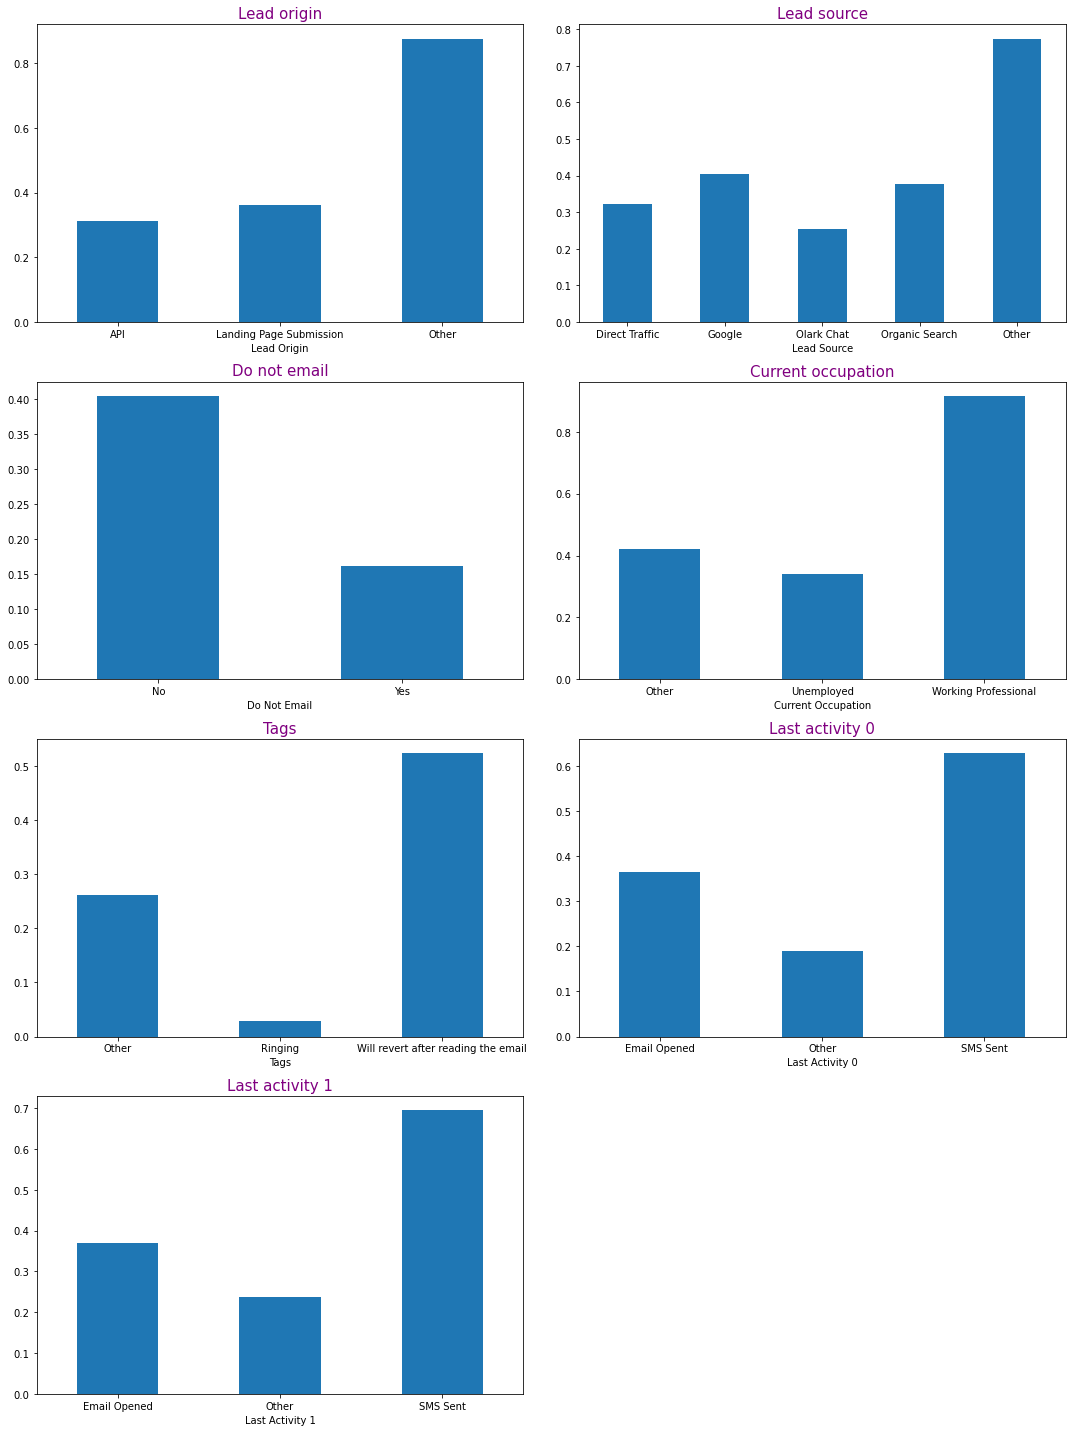

In [81]:
# Categorical vs Converted mean
plt.figure(figsize=[15,20])
j = 1

for i in categorical_col:
    plt.subplot(4,2,j)
    df.groupby(i)['Converted'].mean().plot.bar()
    plt.title(i.capitalize(), fontdict={'color':'purple', 'size':15})
    plt.xticks(rotation=360)
    j = j + 1
    
plt.tight_layout()
plt.show()

- When Last Activity is `SMS Sent` then there is good Converted ratio.
- `Working Proffesional` has more interest towards course.

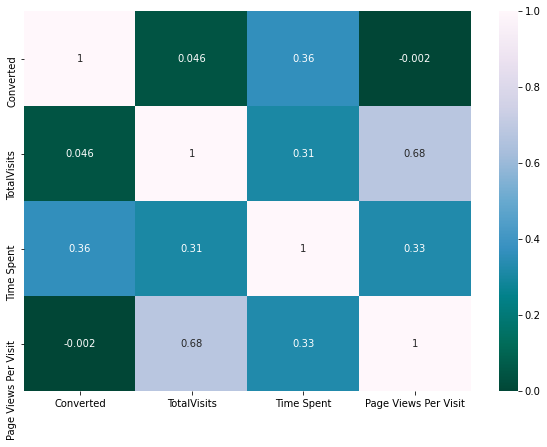

In [82]:
# Heatmap
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(), annot=True, cmap='PuBuGn_r')
plt.show()

- Total Visits and Page Views Per Visit are positive correlate with each other.

## <p style="color:red">4. Data Preparation</p>

### `Create Dummy Variables`

In [83]:
# Get Dummy Variable
df = pd.get_dummies(df)

In [84]:
df.head(3)

,Converted,TotalVisits,Time Spent,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Do Not Email_No,Do Not Email_Yes,Current Occupation_Other,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Activity 0_Email Opened,Last Activity 0_Other,Last Activity 0_SMS Sent,Last Activity 1_Email Opened,Last Activity 1_Other,Last Activity 1_SMS Sent
0,0,0.0,0,0.0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2,1,2.0,1532,2.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0


In [85]:
# Add Lead Number
df['Lead Number'] = Lead_Number

### `Train - Test Split`

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# Splitting Data into Train and Test
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

### `Scaling Data using MinMax`

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Scale Data
min_max = MinMaxScaler()
df_train[['Time Spent', 
    'TotalVisits', 
    'Page Views Per Visit']] = min_max.fit_transform(df_train[['Time Spent', 
                                                         'TotalVisits', 
                                                         'Page Views Per Visit']])

In [90]:
df.head(3)

,Converted,TotalVisits,Time Spent,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Do Not Email_No,Do Not Email_Yes,Current Occupation_Other,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Activity 0_Email Opened,Last Activity 0_Other,Last Activity 0_SMS Sent,Last Activity 1_Email Opened,Last Activity 1_Other,Last Activity 1_SMS Sent,Lead Number
0,0,0.0,0,0.0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,660737
1,0,5.0,674,2.5,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,660728
2,1,2.0,1532,2.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,660727


In [91]:
# Create X and y
X_train = df_train.drop(['Lead Number', 'Converted'], axis=1)
y_train = df_train['Converted']

### `RFE`

In [92]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [93]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Time Spent', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other', False, 11),
 ('Do Not Email_No', True, 1),
 ('Do Not Email_Yes', False, 4),
 ('Current Occupation_Other', False, 5),
 ('Current Occupation_Unemployed', True, 1),
 ('Current Occupation_Working Professional', True, 1),
 ('Tags_Other', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Last Activity 0_Email Opened', False, 7),
 ('Last Activity 0_Other', True, 1),
 ('Last Activity 0_SMS Sent', False, 8),
 ('Last Activity 1_Email Opened', False, 3),
 ('Last Activity 1_Other', False, 2),
 ('Last Activity 1_SMS Sent', True, 1)]

In [95]:
rfe_col = X_train.columns[rfe.support_]

In [96]:
# Column that Not Support by RFE
X_train.columns[~rfe.support_]

Index(['Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Do Not Email_Yes',
       'Current Occupation_Other', 'Last Activity 0_Email Opened',
       'Last Activity 0_SMS Sent', 'Last Activity 1_Email Opened',
       'Last Activity 1_Other'],
      dtype='object')

## <p style="color:red">5. Build Logistic Regression Model</p>

In [97]:
import statsmodels.api as sm

#### `Model 1`

In [98]:
# Logistic regression model 1
X_train_sm = sm.add_constant(X_train[rfe_col])

logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2291.0
Date:                Mon, 08 Mar 2021   Deviance:                       4582.0
Time:                        16:16:11   Pearson chi2:                 9.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_API,inf
4,Lead Origin_Landing Page Submission,inf
5,Lead Origin_Other,inf
10,Tags_Other,inf
11,Tags_Ringing,inf
12,Tags_Will revert after reading the email,inf
9,Current Occupation_Working Professional,3.74
8,Current Occupation_Unemployed,3.69
2,Page Views Per Visit,2.42
6,Lead Source_Olark Chat,2.15


- Drop `Tags_Other` since it has a high VIF and a high P-Value.

In [101]:
# Drop Column
rfe_col = rfe_col.drop('Tags_Other')

#### `Model 2`

In [102]:
# Logistic regression model 2
X_train_sm = sm.add_constant(X_train[rfe_col])

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2291.0
Date:                Mon, 08 Mar 2021   Deviance:                       4582.0
Time:                        16:16:11   Pearson chi2:                 9.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,31.04
3,Lead Origin_API,25.17
5,Lead Origin_Other,5.47
9,Current Occupation_Working Professional,3.74
8,Current Occupation_Unemployed,3.69
2,Page Views Per Visit,2.42
6,Lead Source_Olark Chat,2.15
0,TotalVisits,2.01
11,Tags_Will revert after reading the email,1.36
10,Tags_Ringing,1.33


- Drop `Lead Origin_Landing Page Submission` since it has a high VIF.

In [104]:
# Drop Column
rfe_col = rfe_col.drop('Lead Origin_Landing Page Submission')

#### `Model 3`

In [105]:
# Logistic regression model 3
X_train_sm = sm.add_constant(X_train[rfe_col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2291.0
Date:                Mon, 08 Mar 2021   Deviance:                       4582.0
Time:                        16:16:11   Pearson chi2:                 9.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Current Occupation_Unemployed,14.60
6,Do Not Email_No,10.94
2,Page Views Per Visit,5.34
0,TotalVisits,3.99
10,Tags_Will revert after reading the email,3.26
3,Lead Origin_API,2.83
5,Lead Source_Olark Chat,2.62
8,Current Occupation_Working Professional,2.32
1,Time Spent,2.29
11,Last Activity 0_Other,1.85


- Drop `Lead Origin_API` since it has a high P-Value.

In [107]:
# Drop Column
rfe_col = rfe_col.drop('Lead Origin_API')

#### `Model 4`

In [108]:
# Logistic regression model 4
X_train_sm = sm.add_constant(X_train[rfe_col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2291.0
Date:                Mon, 08 Mar 2021   Deviance:                       4582.0
Time:                        16:16:12   Pearson chi2:                 9.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Current Occupation_Unemployed,14.44
5,Do Not Email_No,10.71
2,Page Views Per Visit,5.26
0,TotalVisits,3.99
9,Tags_Will revert after reading the email,3.24
7,Current Occupation_Working Professional,2.31
1,Time Spent,2.29
4,Lead Source_Olark Chat,2.14
10,Last Activity 0_Other,1.83
11,Last Activity 1_SMS Sent,1.60


- Drop `Current Occupation_Unemployed` since it has a high VIF.

In [110]:
# Drop Column
rfe_col = rfe_col.drop('Current Occupation_Unemployed')

#### `Model 5`

In [111]:
# Logistic regression model 5
X_train_sm = sm.add_constant(X_train[rfe_col])

logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2294.4
Date:                Mon, 08 Mar 2021   Deviance:                       4588.7
Time:                        16:16:12   Pearson chi2:                 9.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Do Not Email_No,5.85
2,Page Views Per Visit,4.98
0,TotalVisits,3.98
8,Tags_Will revert after reading the email,2.99
1,Time Spent,2.27
4,Lead Source_Olark Chat,2.06
9,Last Activity 0_Other,1.58
10,Last Activity 1_SMS Sent,1.56
7,Tags_Ringing,1.44
3,Lead Origin_Other,1.36


- Drop `Do Not Email_No` since it has a high VIF.

In [113]:
# Drop Column
rfe_col = rfe_col.drop('Do Not Email_No')

#### `Model 6`

In [114]:
# Logistic regression model 6
X_train_sm = sm.add_constant(X_train[rfe_col])

logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2317.2
Date:                Mon, 08 Mar 2021   Deviance:                       4634.4
Time:                        16:16:12   Pearson chi2:                 9.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.52
0,TotalVisits,3.92
7,Tags_Will revert after reading the email,2.66
1,Time Spent,2.10
4,Lead Source_Olark Chat,1.61
8,Last Activity 0_Other,1.55
9,Last Activity 1_SMS Sent,1.55
6,Tags_Ringing,1.32
3,Lead Origin_Other,1.20
5,Current Occupation_Working Professional,1.16


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model.

## <p style="color:red">6. Matrix Score Test</p>

In [116]:
# Predicted Probability
df_train['Converted_prob'] = res.predict(X_train_sm)

In [117]:
# Create New Data Frame
y_train_pred_final = pd.DataFrame(df_train[['Lead Number', 'Converted', 'Converted_prob']])
y_train_pred_final.reset_index(inplace=True)
y_train_pred_final = y_train_pred_final.drop('index', axis=1)
y_train_pred_final.head()

,Lead Number,Converted,Converted_prob
0,607471,0,0.000837
1,595517,0,0.285977
2,653091,0,0.000890
3,622325,0,0.272602
4,627445,0,0.272602


In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead Number,Converted,Converted_prob,Predicted
0,607471,0,0.000837,0
1,595517,0,0.285977,0
2,653091,0,0.000890,0
3,622325,0,0.272602,0
4,627445,0,0.272602,0


#### `Confusion Matrix`

In [119]:
from sklearn import metrics

In [120]:
# Create Confusionn Matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3617,  386],
       [ 577, 1881]])

In [121]:
# Predicted       Not_Converted     Converted
# Actual
# Not_Converted     3617(TN)         386(FP)
# Converted         577(FN)          1881(TP)

#### `Accuracy`

In [122]:
# Model Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.8509518650363721

In [123]:
# True Positive
TP = confusion[1,1]

# True Negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

#### `Sensitivity` & `Specificity`

Sensitivity = Predict Positive and It's True / Total Actual Positive

In [124]:
# Let's Calculate Sensitivity
TP / float(TP + FN)

0.7652563059397884

Specificity = Predict Negative and It's True / Total Actual Negative

In [125]:
# Let's Calculate Specificity
TN / float(TN + FP)

0.9035723207594304

In [126]:
# Let's Calculate False Postive Rate (predicting convert when customer does not have converted)
FP / float(FP + TN)

0.09642767924056957

In [127]:
# Let's Calculate False Negative Rate (predicting not convert when customer does have converted)
FN / float(FN + TP)

0.23474369406021156

In [128]:
# Positive Predictive Value 
TP / float(TP + FP)

0.8297309219232466

In [129]:
# Negative Predictive Value
TN / float(TN + FN)

0.8624225083452551

### `ROC Curve`

**An ROC curve demonstrates several things:**
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(7, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver Operating Characteristic (ROC)', fontdict={'color':'purple', 'size':15} )
    plt.legend(loc="lower right")
    
    plt.show()

    return None

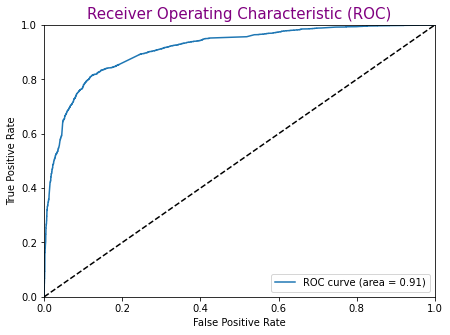

In [131]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

### `Optimal Cutoff`

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x) / 10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] =  y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,607471,0,0.000837,0,1,0,0,0,0,0,0,0,0,0
1,595517,0,0.285977,0,1,1,1,0,0,0,0,0,0,0
2,653091,0,0.000890,0,1,0,0,0,0,0,0,0,0,0
3,622325,0,0.272602,0,1,1,1,0,0,0,0,0,0,0
4,627445,0,0.272602,0,1,1,1,0,0,0,0,0,0,0


In [133]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [float(x) / 10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.380436,1.000000,0.000000
0.1,0.1,0.644328,0.965419,0.447165
0.2,0.2,0.775422,0.917819,0.687984
0.3,0.3,0.833927,0.843369,0.828129
0.4,0.4,0.853428,0.811229,0.879340
0.5,0.5,0.850952,0.765256,0.903572
0.6,0.6,0.845380,0.708706,0.929303
0.7,0.7,0.834546,0.642392,0.952536
0.8,0.8,0.793840,0.497966,0.975518
0.9,0.9,0.750193,0.363303,0.987759


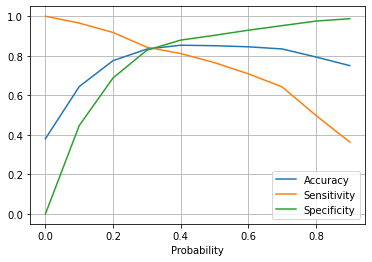

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.grid()
plt.show()

- From the above curve, 0.3 is the optimum point to take it as a cutoff probability.

In [135]:
y_train_pred_final['Final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,607471,0,0.000837,0,1,0,0,0,0,0,0,0,0,0,0
1,595517,0,0.285977,0,1,1,1,0,0,0,0,0,0,0,0
2,653091,0,0.000890,0,1,0,0,0,0,0,0,0,0,0,0
3,622325,0,0.272602,0,1,1,1,0,0,0,0,0,0,0,0
4,627445,0,0.272602,0,1,1,1,0,0,0,0,0,0,0,0


#### `Confusion Matrix`

In [136]:
# Create Confusionn Matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'])
confusion

array([[3315,  688],
       [ 385, 2073]])

In [137]:
# Predicted       Not_Converted     Converted
# Actual
# Not_Converted     3315(TN)         688(FP)
# Converted         385(FN)          2073(TP)

#### `Accuracy`

In [138]:
# Model Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'])

0.8339266367435382

In [139]:
# True Positive
TP = confusion[1,1]

# True Negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

In [140]:
# Let's Calculate Sensitivity
TP / float(TP + FN)

0.8433685923515053

In [141]:
# Let's Calculate Specificity
TN / float(TN + FP)

0.8281289033225081

In [142]:
# Let's Calculate False Postive Rate (predicting convert when customer does not have converted)
FP / float(FP + TN)

0.17187109667749187

In [143]:
# Let's Calculate False Negative Rate (predicting not convert when customer does have converted)
FN / float(FN + TP)

0.1566314076484947

In [144]:
# Positive Predictive Value 
TP / float(TP + FP)

0.7508149221296632

In [145]:
# Negative Predictive Value
TN / float(TN + FN)

0.8959459459459459

### `Precision & Recall`

In [146]:
# Calculate Precision
Precison = TP / float(TP + FP)
Precison

0.7508149221296632

In [147]:
# Calculate Recall
Recall = TP / float(TP + FN)
Recall

0.8433685923515053

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
# Calculate Precision Using In-built Function
precision_score(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'])

0.7508149221296632

In [150]:
# Calculate Recall Using In-built Function
recall_score(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'])

0.8433685923515053

### `Precison Recall Curve`

In [151]:
from sklearn.metrics import precision_recall_curve

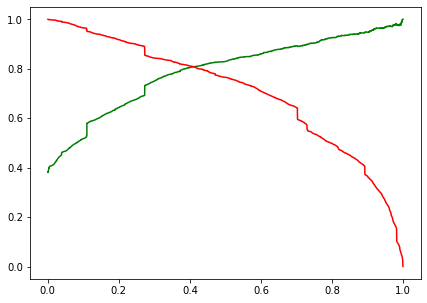

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

plt.figure(figsize=(7,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <p style="color:red">7. Prediction on Test Data</p>

In [153]:
# Scaling Data
df_test[['Time Spent', 
    'TotalVisits', 
    'Page Views Per Visit']] = min_max.fit_transform(df_test[['Time Spent','TotalVisits','Page Views Per Visit']])

In [154]:
# Create X and y
X_test = df_test.drop(['Converted', 'Lead Number'], axis=1)
y_test = df_test['Converted']

In [155]:
# Remove Columns which are not availabe in model
X_test = X_test[rfe_col]
X_test.head()

,TotalVisits,Time Spent,Page Views Per Visit,Lead Origin_Other,Lead Source_Olark Chat,Current Occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,Last Activity 0_Other,Last Activity 1_SMS Sent
6410,0.103448,0.242353,0.1875,0,0,0,1,0,0,1
6435,0.310345,0.694118,0.1875,0,0,0,0,0,0,0
1520,0.413793,0.163765,0.1875,0,0,0,0,0,1,0
6589,0.172414,0.083294,0.3125,0,0,0,0,0,1,0
6889,0.000000,0.000000,0.0000,0,1,0,0,1,1,0


In [156]:
# Add Constant
X_test_sm = sm.add_constant(X_test)

In [157]:
# Making Prediction
df_test['Converted_prob'] = res.predict(X_test_sm)

In [158]:
# Create New Data Frame
y_test_pred_final = pd.DataFrame(df_test[['Lead Number', 'Converted', 'Converted_prob']])
y_test_pred_final.reset_index(inplace=True)
y_test_pred_final = y_test_pred_final.drop('index', axis=1)
y_test_pred_final.head()

,Lead Number,Converted,Converted_prob
0,600788,0,0.032204
1,600639,1,0.706023
2,644182,0,0.079234
3,599247,0,0.020375
4,596748,0,0.110185


In [159]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_test_pred_final.head()

,Lead Number,Converted,Converted_prob,Final_Predicted
0,600788,0,0.032204,0
1,600639,1,0.706023,1
2,644182,0,0.079234,0
3,599247,0,0.020375,0
4,596748,0,0.110185,0


#### `Confusion Matrix`

In [160]:
# Create Confusionn Matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])
confusion

array([[1472,  195],
       [ 218,  884]])

In [161]:
# Predicted       Not_Converted     Converted
# Actual
# Not_Converted     1472(TN)         195(FP)
# Converted         218(FN)          884(TP)

#### `Accuracy`

In [162]:
# Model Accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.8508486818345973

In [163]:
# True Positive
TP = confusion[1,1]

# True Negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

In [164]:
# Let's Calculate Sensitivity
TP / float(TP + FN)

0.8021778584392014

In [165]:
# Let's Calculate Specificity
TN / float(TN + FP)

0.8830233953209358

In [166]:
# Important attributes and its value
coef = [2.9698, 4.7881, -2.5564, 3.8656, 0.7773, 2.4780, -3.3492, 1.1170, -1.1074, 1.8386, -2.8758]
rfe_col = list(rfe_col)

parameter = pd.DataFrame(list(zip(rfe_col, coef)), columns=['Variable', 'Value'])
parameter = parameter.sort_values('Value', ascending=False)
parameter = parameter.reset_index(drop='index')
parameter

,Variable,Value
0,Time Spent,4.7881
1,Lead Origin_Other,3.8656
2,TotalVisits,2.9698
3,Current Occupation_Working Professional,2.4780
4,Last Activity 1_SMS Sent,1.8386
5,Tags_Will revert after reading the email,1.1170
6,Lead Source_Olark Chat,0.7773
7,Last Activity 0_Other,-1.1074
8,Page Views Per Visit,-2.5564
9,Tags_Ringing,-3.3492
